### **Required Libraries**

In [ ]:
import os
import json
import cv2
import librosa
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from warnings import filterwarnings

filterwarnings(action='ignore')

### **Data Collection**

In [ ]:
# Download 'Sound Of 114 Species Of Birds Till 2022' dataset from Kaggle
# Dataset URL = https://www.kaggle.com/datasets/soumendraprasad/sound-of-114-species-of-birds-till-2022?select=Birds+Voice.csv

!kaggle datasets download -d soumendraprasad/sound-of-114-species-of-birds-till-2022

Dataset URL: https://www.kaggle.com/datasets/soumendraprasad/sound-of-114-species-of-birds-till-2022
License(s): CC0-1.0
 99% 2.05G/2.06G [00:33<00:00, 68.5MB/s]
100% 2.06G/2.06G [00:33<00:00, 66.3MB/s]


In [ ]:
# Unzip the dataset

!unzip sound-of-114-species-of-birds-till-2022.zip

### **Sample Audio Checking**

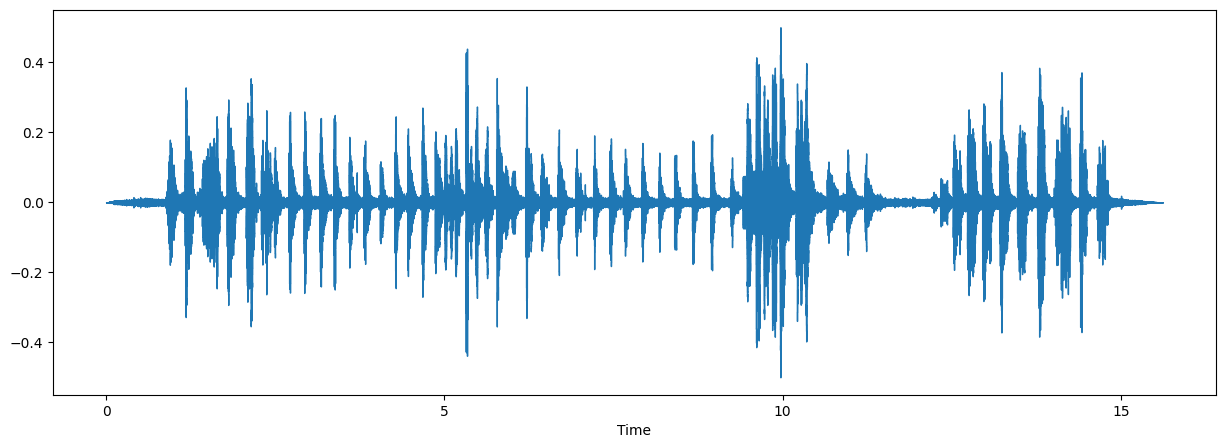

In [ ]:
# Sample Audio Checking

# Set Plot Size
plt.figure(figsize=(15,5))

# Load Audio File to extract Audio Data and Sample Rate
audio_data, sample_rate = librosa.load(path='/content/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan12.mp3')
librosa.display.waveshow(y=audio_data, sr=sample_rate)

# View and Hear Audio File
IPython.display.Audio(data='/content/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan12.mp3')

In [ ]:
# Audio will be automatically converted to Mono Channel [1-Dimentional Signal] Data
audio_data

array([ 8.6401997e-12, -1.2732926e-11, -1.8189894e-12, ...,
        2.2737368e-13,  3.9790393e-13, -8.5265128e-14], dtype=float32)

In [ ]:
# Audio will be automatically resampled to the rate of 22050Hz (default sr=22050)
sample_rate

22050

**Mel-Frequency Cepstral Coefficients (MFCC)**

*MFCC help to extract the features from audio based on frequency and time charecteristics. This features will help in classification.*

- It summarize the frequency distribution across window size.

- So it analyse `frequency & time charecteristics` of the sound.

- This audio representations help to identify the features for classification.


In [ ]:
# Sample Audio Checking
mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)

Default n_mfcc = 20 & we put n_mfcc = 40

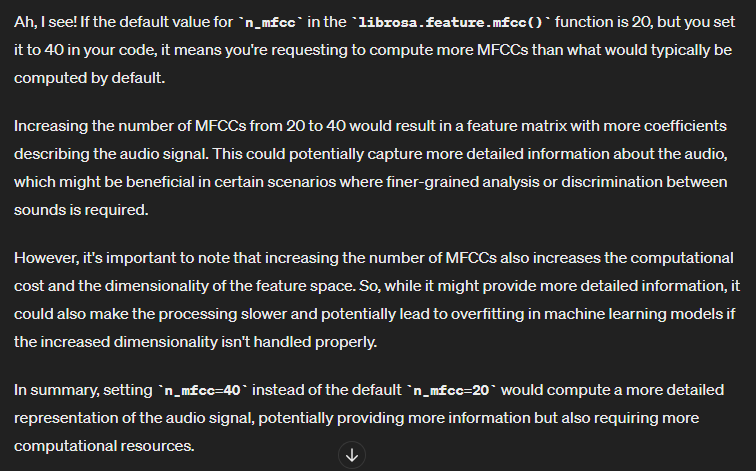

In [ ]:
# Sample Audio Checking
mfccs_features, mfccs_features.shape

(array([[-6.2250494e+02, -6.0999127e+02, -5.7499744e+02, ...,
         -6.2250494e+02, -6.2250494e+02, -6.2250494e+02],
        [ 0.0000000e+00,  1.6979631e+01,  4.1984955e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  1.5081112e+01,  2.0330677e+01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [ 0.0000000e+00, -7.2471941e-01,  3.1355095e-01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -9.6145850e-01, -1.4942662e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, -1.1581554e+00, -1.6853883e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32),
 (40, 673))

which contains Mel-Frequency Cepstral Coefficients (MFCCs) computed from audio data.
The shape `(40, 673)` indicates that
- 40 rows (representing the 40 MFCC features)
- 673 columns (representing different frames or segments of the audio signal).

In [ ]:
# Sample Audio Checking
np.mean(mfccs_features, axis=1)     # axis=1 means row wise mean calculation - shape=(40,0)  &  axis=0 means column wise mean caculation - shape=(673,)

array([-3.0988000e+02,  1.0401821e+01, -9.0290489e+01, -4.4553432e+01,
       -1.8831221e+01,  7.9951978e+00, -1.9813393e+00, -6.6336732e+00,
       -7.9205394e+00,  1.2260886e+01,  1.1192106e+01,  1.1200221e+01,
       -3.1864741e-01,  3.7352815e+00,  5.5541916e+00,  6.4173203e+00,
        4.7119598e+00,  9.6746712e+00, -4.9129989e-02,  4.7118936e+00,
        3.7892053e+00,  8.2409830e+00,  1.1635534e+00,  4.1349072e+00,
        9.1222864e-01,  2.1938601e+00, -1.7673429e+00,  3.5073228e+00,
       -4.5820779e-01,  2.3610861e+00, -5.3835887e-01,  2.1143436e+00,
       -2.3396831e+00,  2.3190188e+00, -1.8095652e+00,  1.0630901e+00,
       -2.8051739e+00, -1.6753919e-01, -1.6882219e+00,  1.8219043e+00],
      dtype=float32)

In [ ]:
np.mean(mfccs_features, axis=1).shape

(40,)

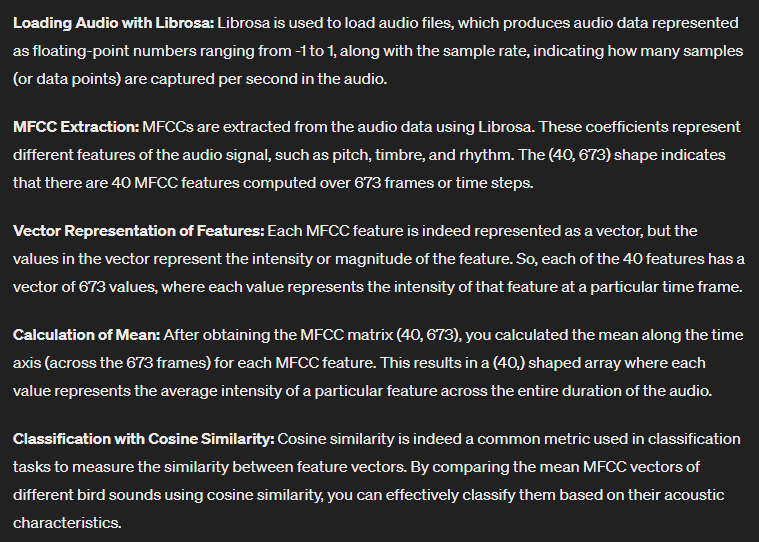

### **Data Preprocessing**

In [ ]:
# Convert the mp3 Audio into Tensors

def audio_to_tensors(audio_file):
    # Extract the Signal and Sample_Rate from Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    return mfccs_tensors

In [ ]:
# Sample Audio
audio_sample = '/content/Voice of Birds/Voice of Birds/Andean Guan_sound/Andean Guan10.mp3'
audio_to_tensors(audio_sample)

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-302.73083   ,   70.47813   ,   13.989463  ,   28.275862  ,
          9.768283  ,    7.4185357 ,    3.663607  ,   12.622561  ,
          0.9152409 ,    3.15177   ,    4.5321455 ,    6.7180853 ,
         -2.076896  ,    5.5894322 ,    3.0978475 ,    1.8796209 ,
         -0.49635005,    6.4944406 ,    2.0897276 ,    4.146482  ,
          2.351528  ,    7.5341434 ,    0.63787776,    5.8428    ,
          4.5193014 ,    5.587803  ,    1.6145756 ,    6.687456  ,
          2.1035836 ,    4.2177606 ,    2.5508912 ,    4.631444  ,
          0.40562922,    4.092282  ,    1.5406473 ,    3.7211802 ,
          0.5173263 ,    3.6272905 ,    0.56133217,    3.1007855 ],
      dtype=float32)>

In [ ]:
# Extract the Features from Audio Files

# Audio Directory Path
directory = '/content/Voice of Birds/Voice of Birds'

extracted_features = []

# Count the total number of files
total_files = sum(len(files) for _, _, files in os.walk(directory))

# Initialize tqdm with the total number of files
with tqdm(total=total_files, desc='Processing files') as pbar:

  for target_class in os.listdir(directory):                               # List of All Target Folder Names in Directory

      target_class_path = os.path.join(directory, target_class)            # Make a Target Folder Path in Directory

      for audio_file in os.listdir(target_class_path):                     # List of All Audio Files in Target Folder

          audio_path = os.path.join(directory, target_class, audio_file)   # Make a Audio File Path from Target Folder in Directory

          features = audio_to_tensors(audio_path)                          # Extract the Features from the Audio File

          extracted_features.append([features, target_class])              # Append the Features and Target_Class in List

          pbar.update(1)                                                   # Update the progress bar for each file processed


Processing files: 100%|██████████| 2161/2161 [07:12<00:00,  4.99it/s]


In [ ]:
extracted_features[0]

[<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-3.9467786e+02,  1.0032762e+02,  3.6598648e+01,  2.2088032e+01,
         2.6641502e+01,  2.1240070e+01,  1.1939941e+01,  5.8201852e+00,
        -5.2358419e-01, -8.0248737e-01, -8.8318646e-01, -1.3231312e+00,
         1.2593701e+00,  2.7074823e+00, -8.0780521e-02, -3.9307585e+00,
        -3.1038489e+00, -2.3066523e+00, -2.1188200e+00, -2.0771582e+00,
        -3.1300569e+00, -4.8070884e+00, -5.5020533e+00, -4.2386403e+00,
        -3.7131948e+00, -4.1274524e+00, -4.4070640e+00, -4.6833396e+00,
        -4.9449525e+00, -5.3223939e+00, -5.4481440e+00, -4.5781732e+00,
        -3.9272885e+00, -3.9100306e+00, -4.1746936e+00, -3.0823328e+00,
        -2.2178659e+00, -2.9086225e+00, -3.1466877e+00, -2.3050287e+00],
       dtype=float32)>,
 'Somali Ostrich_sound']

In [ ]:
# Creating DataFrame from Extracted Features with Class Labels

features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
features_df

,features,class
0,"(tf.Tensor(-394.67786, shape=(), dtype=float32...",Somali Ostrich_sound
1,"(tf.Tensor(-336.2136, shape=(), dtype=float32)...",Brushland Tinamou_sound
2,"(tf.Tensor(-341.05588, shape=(), dtype=float32...",Brushland Tinamou_sound
3,"(tf.Tensor(-341.05588, shape=(), dtype=float32...",Brushland Tinamou_sound
4,"(tf.Tensor(-341.05588, shape=(), dtype=float32...",Brushland Tinamou_sound
...,...,...
2156,"(tf.Tensor(-242.07765, shape=(), dtype=float32...",Baudo Guan_sound
2157,"(tf.Tensor(-313.22552, shape=(), dtype=float32...",Baudo Guan_sound
2158,"(tf.Tensor(-313.22552, shape=(), dtype=float32...",Baudo Guan_sound
2159,"(tf.Tensor(-254.85738, shape=(), dtype=float32...",Baudo Guan_sound


In [ ]:
# Encoding Class Labels using LabelEncoder

target_encoding = LabelEncoder().fit_transform(features_df['class'])
target_encoding

array([87, 17, 17, ...,  6,  6,  6])

In [ ]:
# Adding Encoded Class Labels Column to DataFrame

features_df['target'] = target_encoding.tolist()
features_df

,features,class,target
0,"(tf.Tensor(-394.67786, shape=(), dtype=float32...",Somali Ostrich_sound,87
1,"(tf.Tensor(-336.2136, shape=(), dtype=float32)...",Brushland Tinamou_sound,17
2,"(tf.Tensor(-341.05588, shape=(), dtype=float32...",Brushland Tinamou_sound,17
3,"(tf.Tensor(-341.05588, shape=(), dtype=float32...",Brushland Tinamou_sound,17
4,"(tf.Tensor(-341.05588, shape=(), dtype=float32...",Brushland Tinamou_sound,17
...,...,...,...
2156,"(tf.Tensor(-242.07765, shape=(), dtype=float32...",Baudo Guan_sound,6
2157,"(tf.Tensor(-313.22552, shape=(), dtype=float32...",Baudo Guan_sound,6
2158,"(tf.Tensor(-313.22552, shape=(), dtype=float32...",Baudo Guan_sound,6
2159,"(tf.Tensor(-254.85738, shape=(), dtype=float32...",Baudo Guan_sound,6


In [ ]:
# Creating a Dictionary based on Class and Target columns for Future Prediction

prediction_dict = features_df.set_index('target')['class'].to_dict()
prediction_dict

{87: 'Somali Ostrich_sound',
 17: 'Brushland Tinamou_sound',
 110: 'White-crested Guan_sound',
 42: 'Greater Rhea_sound',
 12: 'Black-capped Tinamou_sound',
 112: 'White-winged Guan_sound',
 55: 'Malleefowl_sound',
 73: 'Red-billed Brushturkey_sound',
 38: 'Elegant Crested Tinamou_sound',
 84: 'Slaty-breasted Tinamou_sound',
 96: 'Tataupa Tinamou_sound',
 76: 'Red-throated Piping Guan_sound',
 30: 'Crested Guan_sound',
 33: 'Dusky Megapode_sound',
 89: 'Southern Cassowary_sound',
 47: 'Hooded Tinamou_sound',
 21: 'Chestnut-bellied Guan_sound',
 59: 'Moluccan Megapode_sound',
 91: 'Spixs Guan_sound',
 104: 'Variegated Tinamou_sound',
 23: 'Chestnut-winged Chachalaca_sound',
 45: 'Grey-legged Tinamou_sound',
 20: 'Chaco Chachalaca_sound',
 83: 'Scaled Chachalaca_sound',
 95: 'Tanimbar Megapode_sound',
 109: 'White-browed Guan_sound',
 92: 'Spotted Nothura_sound',
 56: 'Marail Guan_sound',
 100: 'Tongan Megapode_sound',
 90: 'Speckled Chachalaca_sound',
 46: 'Highland Tinamou_sound',
 41:

In [ ]:
# Save to JSON File

with open(file='/content/prediction.json', mode='w') as f:
    json.dump(prediction_dict, f)

In [ ]:
# Read the Prediction_Dictionary File

with open(file='/content/prediction.json', mode='r') as f:
    prediction_dict = json.load(f)
prediction_dict

{'87': 'Somali Ostrich_sound',
 '17': 'Brushland Tinamou_sound',
 '110': 'White-crested Guan_sound',
 '42': 'Greater Rhea_sound',
 '12': 'Black-capped Tinamou_sound',
 '112': 'White-winged Guan_sound',
 '55': 'Malleefowl_sound',
 '73': 'Red-billed Brushturkey_sound',
 '38': 'Elegant Crested Tinamou_sound',
 '84': 'Slaty-breasted Tinamou_sound',
 '96': 'Tataupa Tinamou_sound',
 '76': 'Red-throated Piping Guan_sound',
 '30': 'Crested Guan_sound',
 '33': 'Dusky Megapode_sound',
 '89': 'Southern Cassowary_sound',
 '47': 'Hooded Tinamou_sound',
 '21': 'Chestnut-bellied Guan_sound',
 '59': 'Moluccan Megapode_sound',
 '91': 'Spixs Guan_sound',
 '104': 'Variegated Tinamou_sound',
 '23': 'Chestnut-winged Chachalaca_sound',
 '45': 'Grey-legged Tinamou_sound',
 '20': 'Chaco Chachalaca_sound',
 '83': 'Scaled Chachalaca_sound',
 '95': 'Tanimbar Megapode_sound',
 '109': 'White-browed Guan_sound',
 '92': 'Spotted Nothura_sound',
 '56': 'Marail Guan_sound',
 '100': 'Tongan Megapode_sound',
 '90': 'Spe

In [ ]:
# Converting Features into List
features = features_df['features'].tolist()
features

[<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-3.9467786e+02,  1.0032762e+02,  3.6598648e+01,  2.2088032e+01,
         2.6641502e+01,  2.1240070e+01,  1.1939941e+01,  5.8201852e+00,
        -5.2358419e-01, -8.0248737e-01, -8.8318646e-01, -1.3231312e+00,
         1.2593701e+00,  2.7074823e+00, -8.0780521e-02, -3.9307585e+00,
        -3.1038489e+00, -2.3066523e+00, -2.1188200e+00, -2.0771582e+00,
        -3.1300569e+00, -4.8070884e+00, -5.5020533e+00, -4.2386403e+00,
        -3.7131948e+00, -4.1274524e+00, -4.4070640e+00, -4.6833396e+00,
        -4.9449525e+00, -5.3223939e+00, -5.4481440e+00, -4.5781732e+00,
        -3.9272885e+00, -3.9100306e+00, -4.1746936e+00, -3.0823328e+00,
        -2.2178659e+00, -2.9086225e+00, -3.1466877e+00, -2.3050287e+00],
       dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-3.36213593e+02,  1.43038044e+01, -3.15040169e+01,  4.00611382e+01,
         1.32310219e+01,  1.95652256e+01,  1.13948402e+01,  8.30507755e+00,
       

In [ ]:
# Converting Targets into Lists
target = features_df['target'].tolist()
print(target)

[87, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 55, 55, 55, 55, 55, 55, 55, 55, 73, 73, 73, 73, 73, 73, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,

In [ ]:
# Converting Features and Targets to TensorFlow Tensors
features_tensor = tf.convert_to_tensor(features)
target_tensor = tf.convert_to_tensor(target)

In [ ]:
features_tensor

<tf.Tensor: shape=(2161, 40), dtype=float32, numpy=
array([[-3.94677856e+02,  1.00327621e+02,  3.65986481e+01, ...,
        -2.90862250e+00, -3.14668775e+00, -2.30502868e+00],
       [-3.36213593e+02,  1.43038044e+01, -3.15040169e+01, ...,
        -1.23992935e-01, -3.52782917e+00,  4.36249852e-01],
       [-3.41055878e+02, -5.67427750e+01, -4.39397011e+01, ...,
        -5.59347451e-01, -5.51060009e+00, -1.84862208e+00],
       ...,
       [-3.13225525e+02,  7.63978500e+01, -3.17559204e+01, ...,
         2.59514260e+00, -9.54236746e-01, -2.81311178e+00],
       [-2.54857376e+02,  7.34298248e+01,  4.06320620e+00, ...,
         3.06280684e+00,  2.35430360e+00, -9.08990502e-01],
       [-1.98573837e+02,  1.00807648e+02, -2.96748829e+00, ...,
        -1.34141481e+00,  2.73316145e+00, -7.83617854e-01]], dtype=float32)>

In [ ]:
target_tensor

<tf.Tensor: shape=(2161,), dtype=int32, numpy=array([87, 17, 17, ...,  6,  6,  6], dtype=int32)>

In [ ]:
# Creating TensorFlow Dataset from Tensors
dataset = tf.data.Dataset.from_tensor_slices((features_tensor, target_tensor))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(40,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [ ]:
# Split the dataset into batches
batch_size = 32
dataset = dataset.batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Length of Batched Potato Dataset
len(dataset)

68

In [ ]:
# Maximum Number of Images Count
68*32

2176

In [ ]:
# No of images in Last Badge
2176-2161

15

In [ ]:
# Define a Function process to Split Dataset into Training(80%), Validation(10%) and Testing(10%) Sets

def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)                                                  # Batch Images dataset Length is 68
    train_batch_count = int(dataset_batch_count * train_size)                           # int(68*0.8) ---> 54 Batches are Training
    validation_test_batch_count = int(dataset_batch_count * validation_size)            # int(68*0.1) ---> 6 Batches are validation & Remaining Testing

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)                             # Suffling the Dataset help to Model Understand the Data Well

    train_ds = dataset.take(train_batch_count)                                          # First 54 Batches are Training_Dataset
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)   # Remaining 14 Batches ---> Next 6 Batch are Validation_Dataset
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)         # Pending 8 Batches are Testing

    return train_ds, validation_ds, test_ds

In [ ]:
# Apply the Function in Potato Dataset
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(54, 6, 8)

(40,)
[-242.01132      58.600323     11.780949     45.93892     -20.709957
    9.34854      11.737148     -9.9624       -7.4014897     6.72598
   -7.599079     -4.4239817     9.497133     -3.658985     -9.756221
   18.34301      -9.543012      6.6801047    17.342012     -4.6701136
    5.1995325     6.759228     -6.051554      6.927766     -4.042243
   -1.7995124    -1.2591351    -2.4368238    -6.7458415     5.700297
   -5.080912     -2.615284      0.86428964   -3.0379727    -3.3064246
    1.0706127    -4.1376934    -2.077459     -4.087443      0.59667313]

(32,)
56



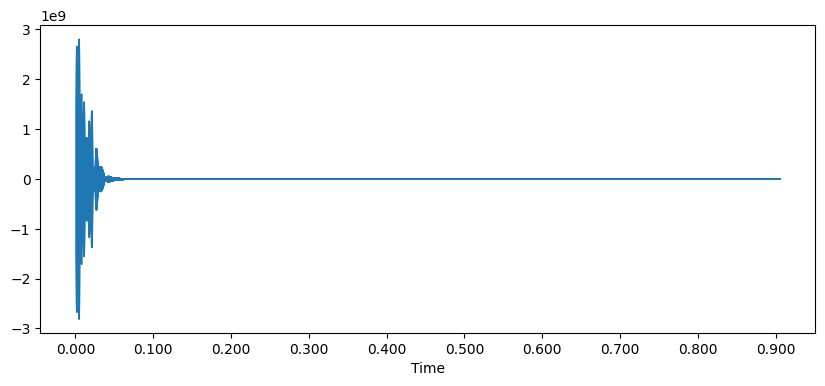

In [ ]:
# Visualize the Image and Label Batches from TensorFlow Dataset

for audio_batch, label_batch in train_ds.take(1):
    print(audio_batch.numpy()[0].shape)
    print(audio_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

    audio = librosa.feature.inverse.mfcc_to_audio(audio_batch.numpy())

    # Plot the reconstructed audio waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio)
    plt.show()

In [ ]:
# Overview of Training Dataset Structure and Specifications
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Building an Optimized Data Pipeline for Enhanced Performance

# Training Dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
validation_ds = validation_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Testing Dataset
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

### **Model Building & Training**

In [ ]:
# Define the Parameters of Input_shape, Channel and Target

mfcc_features = 40    # Extracted features from Audio
channel = 1           # Mono Channel
target = 114          # Output Classes

input_shape = (mfcc_features, channel)
input_shape

(40, 1)

In [ ]:
# Build a CNN Model Architecture

model = keras.Sequential([

            # Input Layer
            keras.layers.Input(shape=input_shape),

            # 1st Conv Layer
            keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 2nd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 3rd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # Flatten and Convert into 1-Dimentional Vector
            keras.layers.Flatten(),

            # 1st Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # 2nd Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # Output Layer
            keras.layers.Dense(units=target, activation='softmax')
        ])

model

In [ ]:
# Display the Model Summary

model.build(input_shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 38, 128)           512       
                                                                 
 batch_normalization_9 (Bat  (None, 38, 128)           512       
 chNormalization)                                                
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 19, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 17, 256)           98560     
                                                                 
 batch_normalization_10 (Ba  (None, 17, 256)           1024      
 tchNormalization)                                               
                                                      

In [ ]:
# Compiling the Model with Optimizer, Loss, and Metrics

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model

In [ ]:
# Model Training with Training_Dataset and Evaluated with Validation_Dataset

history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=700,
                    verbose=1,
                    validation_data = validation_ds)
history

Epoch 1/700
54/54 [==============================] - 5s 15ms/step - loss: 17.4140 - accuracy: 0.0046 - val_loss: 16.7580 - val_accuracy: 0.0000e+00
Epoch 2/700
54/54 [==============================] - 0s 9ms/step - loss: 17.1533 - accuracy: 0.0133 - val_loss: 16.7088 - val_accuracy: 0.0104
Epoch 3/700
54/54 [==============================] - 0s 8ms/step - loss: 16.9239 - accuracy: 0.0127 - val_loss: 16.6602 - val_accuracy: 0.0052
Epoch 4/700
54/54 [==============================] - 0s 7ms/step - loss: 16.7822 - accuracy: 0.0260 - val_loss: 16.6147 - val_accuracy: 0.0104
Epoch 5/700
54/54 [==============================] - 0s 8ms/step - loss: 16.6622 - accuracy: 0.0243 - val_loss: 16.5568 - val_accuracy: 0.0104
Epoch 6/700
54/54 [==============================] - 0s 8ms/step - loss: 16.5343 - accuracy: 0.0289 - val_loss: 16.4873 - val_accuracy: 0.0312
Epoch 7/700
54/54 [==============================] - 0s 8ms/step - loss: 16.3991 - accuracy: 0.0324 - val_loss: 16.3998 - val_accuracy: 0

In [ ]:
# Evaluating Model Performance on Test Dataset
model.evaluate(test_ds)

8/8 [==============================] - 0s 4ms/step - loss: 1.1884 - accuracy: 0.9336


[1.1883883476257324, 0.93359375]

In [ ]:
# Accessing Training History Parameters
history.params

{'verbose': 1, 'epochs': 700, 'steps': 54}

In [ ]:
# Accessing Keys of Training History
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Extracting Accuracy Metrics from Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting Loss Metrics from Training History
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
len(acc), len(val_acc), len(loss), len(val_loss)

(700, 700, 700, 700)

In [ ]:
# Save the Model
model.save('/content/model.h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

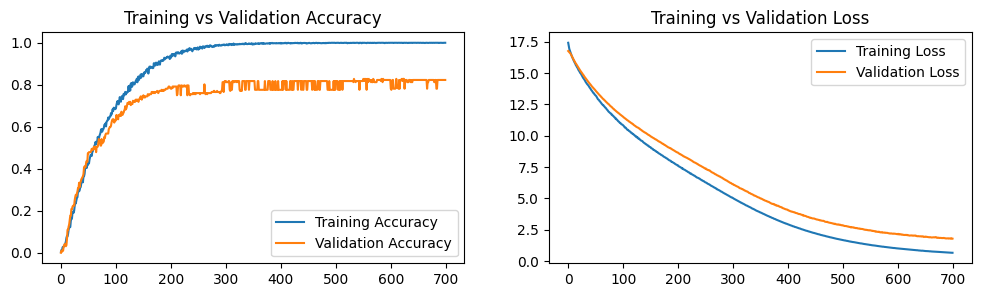

In [ ]:
# Visualize the Acuuracy & Loss using Plots

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

### **Model Inference**

In [ ]:
def prediction(audio_file):

    # Load the Prediction JSON File to Predict Target_Label
    with open('/content/prediction.json', mode='r') as f:
        prediction_dict = json.load(f)

    # Extract the Audio_Signal and Sample_Rate from Input Audio
    audio, sample_rate =librosa.load(audio_file)

    # Extract the MFCC Features and Aggrigate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Reshape MFCC features to match the expected input shape for Conv1D both batch & feature dimension
    mfccs_features = np.expand_dims(mfccs_features, axis=0)
    mfccs_features = np.expand_dims(mfccs_features, axis=2)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    # Load the Model and Prediction
    model = tf.keras.models.load_model('/content/model.h5')
    prediction = model.predict(mfccs_tensors)

    # Find the Maximum Probability Value
    target_label = np.argmax(prediction)

    # Find the Target_Label Name using Prediction_dict
    predicted_class = prediction_dict[str(target_label)]
    confidence = round(np.max(prediction)*100, 2)

    print(f'Predicted Class : {predicted_class}')
    print(f'Confident : {confidence}%')

In [ ]:
prediction('/content/Andean Guan2.mp3')

1/1 [==============================] - 0s 167ms/step
Predicted Class : Andean Guan_sound
Confident : 83.22%


In [ ]:
prediction('/content/Band-tailed Guan2.mp3')

1/1 [==============================] - 0s 178ms/step
Predicted Class : Band-tailed Guan_sound
Confident : 31.26%


In [ ]:
prediction('/content/Maleo4.mp3')

1/1 [==============================] - 0s 181ms/step
Predicted Class : Maleo_sound
Confident : 85.04%
